

***
***

# Introduction to Word Embeddings
Analyzing Meaning through Word Embeddings

***
***

![image.png](img/chengjun.png)

**Using vectors to represent things**
- one of the most fascinating ideas in machine learning. 
- Word2vec is a method to efficiently create word embeddings. 
    - Mikolov et al. (2013). [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
    - Mikolov et al. (2013). [Distributed representations of words and phrases and their compositionality](https://arxiv.org/pdf/1310.4546.pdf)



***
***

## The Geometry of Culture

Analyzing Meaning through Word Embeddings

***
***

Austin C. Kozlowski; Matt Taddy; James A. Evans

Word embeddings represent **semantic relations** between words as **geometric relationships** between vectors in a high-dimensional space, operationalizing a relational model of meaning consistent with contemporary theories of identity and culture. 


- Dimensions induced by word differences (e.g. man - woman, rich - poor, black - white, liberal - conservative) in these vector spaces closely correspond to dimensions of cultural meaning, 
- Macro-cultural investigation with a longitudinal analysis of the coevolution of gender and class associations in the United States over the 20th century 

The success of these high-dimensional models motivates a move towards "high-dimensional theorizing" of meanings, identities and cultural processes.

<img src= 'img/word2vec/gender_class.png' width= "700px">


## HistWords 

HistWords is a collection of tools and datasets for analyzing language change using word vector embeddings. 

- The goal of this project is to facilitate quantitative research in diachronic linguistics, history, and the digital humanities.


- We used the historical word vectors in HistWords to study the semantic evolution of more than 30,000 words across 4 languages. 

- This study led us to propose two statistical laws that govern the evolution of word meaning 


https://nlp.stanford.edu/projects/histwords/

https://github.com/williamleif/histwords



**Diachronic Word Embeddings Reveal Statistical Laws of Semantic Change**

<img src= 'img/word2vec/wordpaths-final.png' width= "900px">

## Word embeddings quantify 100 years of gender and ethnic stereotypes

http://www.pnas.org/content/early/2018/03/30/1720347115

<img src= 'img/word2vec/sex.png' width= "500px">


## Semantics derived automatically from language corpora contain human-like biases.

![](./img/word2vec/bias.png)

Caliskan, A., Bryson, J. J., & Narayanan, A. (2017). Semantics derived automatically from language corpora contain human-like biases. Science, 356(6334), 183– 186.

## The Illustrated Word2vec

Jay Alammar.  https://jalammar.github.io/illustrated-word2vec/

## Personality Embeddings

> What are you like?

**Big Five personality traits**: openness to experience, conscientiousness, extraversion, agreeableness, and neuroticism
- the five-factor model (FFM) 
- **the OCEAN model**



- 开放性（openness）：具有想象、审美、情感丰富、求异、创造、智能等特质。
- 责任心（conscientiousness）：显示胜任、公正、条理、尽职、成就、自律、谨慎、克制等特点。
- 外倾性（extraversion）：表现出热情、社交、果断、活跃、冒险、乐观等特质。
- 宜人性（agreeableness）：具有信任、利他、直率、依从、谦虚、移情等特质。
- 神经质或情绪稳定性（neuroticism）：具有平衡焦虑、敌对、压抑、自我意识、冲动、脆弱等情绪的特质，即具有保持情绪稳定的能力。

In [28]:
# Personality Embeddings: What are you like?
jay = [-0.4, 0.8, 0.5, -0.2, 0.3]
john = [-0.3, 0.2, 0.3, -0.4, 0.9]
mike = [-0.5, -0.4, -0.2, 0.7, -0.1]

## Cosine Similarity
The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:

$$
\mathbf{A}\cdot\mathbf{B}
=\left\|\mathbf{A}\right\|\left\|\mathbf{B}\right\|\cos\theta
$$


$$
\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} },
$$

where $A_i$ and $B_i$ are components of vector $A$ and $B$ respectively.

In [29]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

cos_sim([1, 0, -1], [-1,-1, 0])

-0.4999999999999999

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[1, 0, -1]], [[-1,-1, 0]])

array([[-0.5]])

$$CosineDistance = 1- CosineSimilarity$$

In [31]:
from scipy import spatial
# spatial.distance.cosine computes 
# the Cosine distance between 1-D arrays.
1 - spatial.distance.cosine([1, 0, -1], [-1,-1, 0]) 

-0.5

In [32]:
cos_sim(jay, john)

0.6582337075311759

In [33]:
cos_sim(jay, mike)

-0.3683509554826695

Cosine similarity works for any number of dimensions. 
- We can represent people (and things) as vectors of numbers (which is great for machines!).
- We can easily calculate how similar vectors are to each other.

## Word Embeddings


### Google News Word2Vec

You can download Google’s pre-trained model here.

- It’s 1.5GB! 
- It includes word vectors for a vocabulary of 3 million words and phrases 
- It is trained on roughly 100 billion words from a Google News dataset. 
- The vector length is 300 features.

http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/

Using the **Gensim** library in python, we can 
- find the most similar words to the resulting vector. 
- add and subtract word vectors, 


In [34]:
import gensim
# Load Google's pre-trained Word2Vec model.
filepath = '/Users/datalab/bigdata/GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=True) 

In [38]:
model['woman'][:10]

array([ 0.24316406, -0.07714844, -0.10302734, -0.10742188,  0.11816406,
       -0.10742188, -0.11425781,  0.02563477,  0.11181641,  0.04858398],
      dtype=float32)

In [51]:
model.most_similar('Socrates')

[('Plato_Apology', 0.5661361217498779),
 ('philosopher_Socrates', 0.561074435710907),
 ('Aristotle', 0.5599992275238037),
 ('Parmenides', 0.541626513004303),
 ('Sophists', 0.5381807088851929),
 ('Sócrates', 0.533310055732727),
 ('Plato', 0.5317621827125549),
 ('philosopher_Aristotle', 0.5256754159927368),
 ('Plato_Socrates', 0.524064838886261),
 ('philosopher_Plato', 0.5164784789085388)]

In [52]:
model.similarity('woman', 'man')

0.76640123

In [53]:
cos_sim(model['woman'], model['man'])

0.76640123

In [61]:
#model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)
model.most_similar(positive=['London', 'China'], negative=['Beijing'], topn=5)
#model.most_similar(positive=['big', 'worst'], negative=['bad'], topn=5)
#model.most_similar(positive=['go', 'do'], negative=['did'], topn=5)

[('UK', 0.6304795742034912),
 ('Britain', 0.6012536287307739),
 ('EURASIAN_NATURAL_RESOURCES_CORP.', 0.5524139404296875),
 ('Europe', 0.5444059371948242),
 ('United_Kingdom', 0.5375455021858215)]

$$King- Queen = Man - Woman$$


<img src= 'img/word2vec/word2vec.png' width= "700px">

In [70]:
from numpy import dot  #Dot product#
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial


def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

def cos(x, y):
    return 1 - spatial.distance.cosine(x, y)

def nrm(x):
    # Normalize vector#
    return x/norm(x)

def dimension(x, y):
    # Calculate semantic dimension from antonym pair#
    return nrm(nrm(x)-nrm(y))


In [72]:
dimension(model['man'], model['woman'])[:10]

array([ 0.07256063,  0.12535858,  0.07870991,  0.0066219 , -0.00821159,
        0.03305559, -0.06257528, -0.00975556,  0.02929368, -0.02553372],
      dtype=float32)

In [73]:
###IMPORT LISTS OF TERMS TO PROJECT AND ANTONYM PAIRS#####
import pandas as pd
ant_pairs_aff = pd.read_csv("../data/word_pairs/affluence_pairs.csv",header=None)
ant_pairs_gen = pd.read_csv("../data/word_pairs/gender_pairs.csv",header=None)
ant_pairs_race = pd.read_csv("../data/word_pairs/race_pairs.csv",header=None)

```R
make_dim<-function(embedding,pairs){
                    word_dims<-data.frame(matrix(NA,nrow(pairs),300))
                    for (j in 1:nrow(pairs)){
                    rp_word1<-pairs[j,1]
                    rp_word2<-pairs[j,2]
                    tryCatch(word_dims[j,]<-dimension(embedding[rp_word1,],
                        embedding[rp_word2,]),
                        error=function(e){})
                    }
                    dim_ave<-colMeans(word_dims, na.rm = TRUE)
                    dim_ave_n<-nrm(dim_ave)
                    return(dim_ave_n)
                    }
```

In [74]:
def make_dim(model, df):
    word_dims = []
    for i in df.index:
        rp_word1 = df[0][i]
        rp_word2 = df[1][i]
        try:
            word_dims.append( dimension(model[rp_word1], model[rp_word2]) )
        except:
            pass
    dim_ave = pd.DataFrame(word_dims).mean().tolist()
    dim_ave_= nrm(dim_ave)
    return dim_ave
    

In [75]:
aff_dim = make_dim(model, ant_pairs_aff)
gender_dim = make_dim(model, ant_pairs_gen)
race_dim = make_dim(model, ant_pairs_race)


In [76]:
cos(aff_dim,gender_dim), cos(aff_dim,race_dim), cos(gender_dim,race_dim)

(-0.014282578052009498, -0.10834102639266807, -0.06033891833467253)

In [77]:
wlist=["camping","baseball","boxing","volleyball","softball","golf","tennis","soccer","basketball","hockey"]

aff_proj = [cos(aff_dim, model[i]) for i in wlist]
gender_proj = [cos(gender_dim, model[i]) for i in wlist]
race_proj = [cos(race_dim, model[i]) for i in wlist]

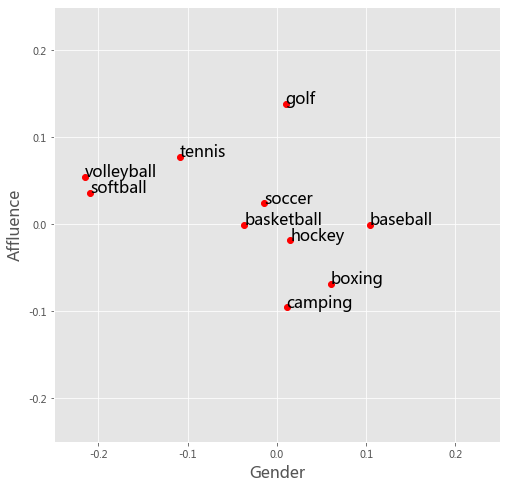

In [78]:
# plot
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

plt.figure(figsize  = [8, 8])
plt.plot(gender_proj, aff_proj, 'ro')
for k, i in enumerate(wlist):
    plt.text(gender_proj[k], aff_proj[k], i, fontsize = 16)
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])
plt.xlabel('Gender', fontsize = 16)
plt.ylabel('Affluence', fontsize = 16)

plt.show()

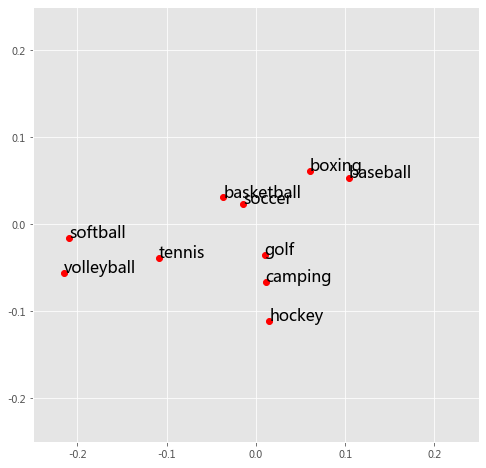

In [96]:
plt.figure(figsize  = [8, 8])
plt.plot(gender_proj, race_proj, 'ro')
for k, i in enumerate(wlist):
    plt.text(gender_proj[k], race_proj[k], i, fontsize = 16)
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])

plt.show()

Now that we’ve looked at trained word embeddings, 

- let’s learn more about the training process. 
- But before we get to word2vec, we need to look at a conceptual parent of word embeddings: **the neural language model**.



# The neural language model

“You shall know a word by the company it keeps” J.R. Firth



> Bengio 2003 A Neural Probabilistic Language Model. Journal of Machine Learning Research. 3:1137–1155

After being trained, early neural language models (Bengio 2003) would calculate a prediction in three steps:



<img src= 'img/word2vec/bengio.png' width= "800px">

Bengio 2003


The $y_i$ are the unnormalized log-probabilities for each output word i, computed as follows, with
parameters b,W,U,d and H:

$$y = b+W x+U tanh(d +Hx) $$

where the hyperbolic tangent tanh is applied element by element, W is optionally zero (no direct
connections), and x is the word features layer activation vector, which is the concatenation of the
input word features from the matrix C:

$$x = (C(wt−1),C(wt−2),··· ,C(wt−n+1))$$



<img src= 'img/word2vec/neural-language-model-prediction.png' width= "700px">


In [79]:
import torch
from torch import nn

# nn.Embedding is a look-up table 
# As no model has been trained, they will be random.
nn.Embedding?

In [80]:
import torch
from torch import nn

# nn.Embedding is a look-up table 
# As no model has been trained, they will be random.
embedding = nn.Embedding(10, 5)
# it contains 10 tensors (vocab_size = 10) of size 5 (embedding_dim = 3)
# a batch of 2 samples of 1 indices each 
input = torch.LongTensor([[1],[4]])
embedding(input)
# return the embedding vectors corresponding 
# to the word 1 and 4 in your vocabulary. 


tensor([[[ 0.0313,  0.2405, -0.2528,  0.4643, -0.5979]],

        [[ 1.4610,  0.4069, -1.8128,  0.0924, -0.9638]]],
       grad_fn=<EmbeddingBackward>)

The output of the neural language model is a probability score for all the words the model knows. 
- We're referring to the probability as a percentage here, 
- but 40% would actually be represented as 0.4 in the output vector.


## Language Model Training

- We get a lot of text data (say, all Wikipedia articles, for example). then
- We have a window (say, of three words) that we slide against all of that text.
- The sliding window generates training samples for our model


<img src= 'img/word2vec/lm-sliding-window-4.png' width= "700px">

As this window slides against the text, we (virtually) generate a dataset that we use to train a model. 

Instead of only looking two words before the target word, we can also look at two words after it.




<img src= 'img/word2vec/continuous-bag-of-words-example.png' width= "700px">



If we do this, the dataset we’re virtually building and training the model against would look like this:

<img src= 'img/word2vec/continuous-bag-of-words-dataset.png' width= "700px">

This is called a **Continuous Bag of Words** (CBOW) https://arxiv.org/pdf/1301.3781.pdf

## Skip-gram
Instead of guessing a word based on its context (the words before and after it), this other architecture tries to guess neighboring words using the current word. 

<img src= 'img/word2vec/skipgram.png' width= "700px">

https://arxiv.org/pdf/1301.3781.pdf



<img src= 'img/word2vec/skipgram-sliding-window-samples.png' width= "700px">

The pink boxes are in different shades because this sliding window actually creates four separate samples in our training dataset.


- We then slide our window to the next position:
- Which generates our next four examples:




<img src= 'img/word2vec/skipgram-language-model-training.png' width= "700px">



<img src= 'img/word2vec/skipgram-language-model-training-4.png' width= "700px">



<img src= 'img/word2vec/skipgram-language-model-training-5.png' width= "700px">



<img src= 'img/word2vec/language-model-expensive.png' width= "700px">

## Negative Sampling


And switch it to a model that takes the input and output word, and outputs a score indicating **if they’re neighbors or not** 
- 0 for “not neighbors”, 1 for “neighbors”.



<img src= 'img/word2vec/are-the-words-neighbors.png' width= "700px">


<img src= 'img/word2vec/word2vec-negative-sampling-2.png' width= "700px">

we need to introduce negative samples to our dataset
- samples of words that are not neighbors. 
- Our model needs to return 0 for those samples.
- This leads to a great tradeoff of computational and statistical efficiency.

## Skipgram with Negative Sampling (SGNS)


The *skip-gram* model assumes that a word can be used to generate its surrounding words in a text sequence.
Take the text sequence "the", "man", "loves", "his", "son" as an example.
Let us choose "loves" as the *center word* and set the context window size to 2.


Given the center word "loves",
the skip-gram model considers
the conditional probability for generating the *context words*: "the", "man", "his", and "son",
which are no more than 2 words away from the center word:

$$P(\textrm{"the"},\textrm{"man"},\textrm{"his"},\textrm{"son"}\mid\textrm{"loves"}).$$


Assume that
the context words are independently generated
given the center word (i.e., conditional independence).
In this case, the above conditional probability
can be rewritten as

$$P(\textrm{"the"}\mid\textrm{"loves"})\cdot P(\textrm{"man"}\mid\textrm{"loves"})\cdot P(\textrm{"his"}\mid\textrm{"loves"})\cdot P(\textrm{"son"}\mid\textrm{"loves"}).$$

In the skip-gram model, each word
has two $d$-dimensional-vector representations
for calculating conditional probabilities.
More concretely,
for any word with index $i$ in the dictionary,
denote by $\mathbf{v}_i\in\mathbb{R}^d$
and $\mathbf{u}_i\in\mathbb{R}^d$
its two vectors
when used as a *center* word and a *context* word, respectively.
The conditional probability of generating any
context word $w_o$ (with index $o$ in the dictionary) given the center word $w_c$ (with index $c$ in the dictionary) can be modeled by
a softmax operation on vector dot products:


$$P(w_o \mid w_c) = \frac{\text{exp}(\mathbf{u}_o^\top \mathbf{v}_c)}{ \sum_{i \in \mathcal{V}} \text{exp}(\mathbf{u}_i^\top \mathbf{v}_c)},$$

where the vocabulary index set $\mathcal{V} = \{0, 1, \ldots, |\mathcal{V}|-1\}$.
Given a text sequence of length $T$, where the word at time step $t$ is denoted as $w^{(t)}$.
Assume that
context words are independently generated
given any center word.

http://d2l.ai/chapter_natural-language-processing-pretraining/word2vec.html#the-skip-gram-model


## Word2vec Training Process


<img src= 'img/word2vec/word2vec-training-update.png' width= "700px">


<img src= 'img/word2vec/cbow.png' width= "700px">

![](./img/word2vec/cbow6.jpg)
Skip-Gram

# Pytorch word2vec 
https://github.com/jojonki/word2vec-pytorch/blob/master/word2vec.ipynb

https://github.com/bamtercelboo/pytorch_word2vec/blob/master/model.py

In [81]:
# see http://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) 

In [82]:
text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells."""

text = text.replace(',', '').replace('.', '').lower().split()

In [83]:
# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(text)
vocab_size = len(vocab)
print('vocab_size:', vocab_size)

w2i = {w: i for i, w in enumerate(vocab)}
i2w = {i: w for i, w in enumerate(vocab)}

vocab_size: 44


In [84]:
# context window size is two
def create_cbow_dataset(text):
    data = []
    for i in range(2, len(text) - 2):
        context = [text[i - 2], text[i - 1],
                   text[i + 1], text[i + 2]]
        target = text[i]
        data.append((context, target))
    return data

cbow_train = create_cbow_dataset(text)
print('cbow sample', cbow_train[0])


cbow sample (['we', 'are', 'to', 'study'], 'about')


In [85]:
def create_skipgram_dataset(text):
    import random
    data = []
    for i in range(2, len(text) - 2):
        data.append((text[i], text[i-2], 1))
        data.append((text[i], text[i-1], 1))
        data.append((text[i], text[i+1], 1))
        data.append((text[i], text[i+2], 1))
        # negative sampling
        for _ in range(4):
            if random.random() < 0.5 or i >= len(text) - 3:
                rand_id = random.randint(0, i-1)
            else:
                rand_id = random.randint(i+3, len(text)-1)
            data.append((text[i], text[rand_id], 0))
    return data


skipgram_train = create_skipgram_dataset(text)
print('skipgram sample', skipgram_train[0])

skipgram sample ('about', 'we', 1)


In [86]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embd_size, context_size, hidden_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embd_size)
        self.linear1 = nn.Linear(2*context_size*embd_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, inputs):
        embedded = self.embeddings(inputs).view((1, -1))
        hid = F.relu(self.linear1(embedded))
        out = self.linear2(hid)
        log_probs = F.log_softmax(out, dim = 1)
        return log_probs
    
    def extract(self, inputs):
        embeds = self.embeddings(inputs)
        return embeds

In [91]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embd_size):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embd_size)
    
    def forward(self, focus, context):
        embed_focus = self.embeddings(focus).view((1, -1)) # input
        embed_ctx = self.embeddings(context).view((1, -1)) # output
        score = torch.mm(embed_focus, torch.t(embed_ctx)) # input*output
        log_probs = F.logsigmoid(score) # sigmoid
        return log_probs
    
    def extract(self, focus):
        embed_focus = self.embeddings(focus)
        return embed_focus

`torch.mm` Performs a matrix multiplication of the matrices 

`torch.t` Expects :attr:`input` to be a matrix (2-D tensor) and transposes dimensions 0
and 1. Can be seen as a short-hand function for ``transpose(input, 0, 1)``.

In [87]:
embd_size = 100
learning_rate = 0.001
n_epoch = 30
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

In [88]:
def train_cbow():
    hidden_size = 64
    losses = []
    loss_fn = nn.NLLLoss()
    model = CBOW(vocab_size, embd_size, CONTEXT_SIZE, hidden_size)
    print(model)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(n_epoch):
        total_loss = .0
        for context, target in cbow_train:
            ctx_idxs = [w2i[w] for w in context]
            ctx_var = Variable(torch.LongTensor(ctx_idxs))

            model.zero_grad()
            log_probs = model(ctx_var)

            loss = loss_fn(log_probs, Variable(torch.LongTensor([w2i[target]])))

            loss.backward()
            optimizer.step()

            total_loss += loss.data.item()
        losses.append(total_loss)
    return model, losses 

In [89]:
def train_skipgram():
    losses = []
    loss_fn = nn.MSELoss()
    model = SkipGram(vocab_size, embd_size)
    print(model)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(n_epoch):
        total_loss = .0
        for in_w, out_w, target in skipgram_train:
            in_w_var = Variable(torch.LongTensor([w2i[in_w]]))
            out_w_var = Variable(torch.LongTensor([w2i[out_w]]))
            
            model.zero_grad()
            log_probs = model(in_w_var, out_w_var)
            loss = loss_fn(log_probs[0], Variable(torch.Tensor([target])))
            
            loss.backward()
            optimizer.step()

            total_loss += loss.data.item()
        losses.append(total_loss)
    return model, losses

In [92]:
cbow_model, cbow_losses = train_cbow()
sg_model, sg_losses = train_skipgram()

CBOW(
  (embeddings): Embedding(44, 100)
  (linear1): Linear(in_features=400, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=44, bias=True)
)
SkipGram(
  (embeddings): Embedding(44, 100)
)


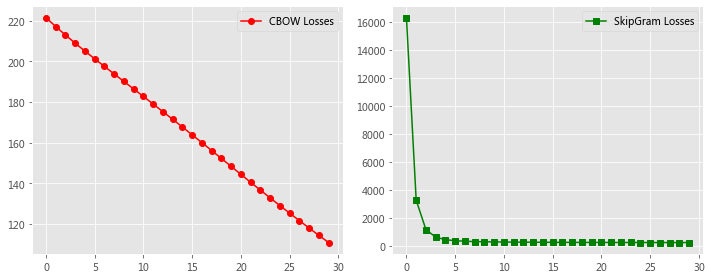

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 4))
plt.subplot(121)
plt.plot(range(n_epoch), cbow_losses, 'r-o', label = 'CBOW Losses')
plt.legend()
plt.subplot(122)
plt.plot(range(n_epoch), sg_losses, 'g-s', label = 'SkipGram Losses')
plt.legend()
plt.tight_layout()


In [97]:
cbow_vec = cbow_model.extract(Variable(torch.LongTensor([v for v in w2i.values()])))
cbow_vec = cbow_vec.data.numpy()
cbow_vec[0][:10], i2w[0]

(array([-1.1374452 , -1.3485855 ,  0.15501103, -0.5359996 ,  0.25174624,
         0.25963616, -0.5872643 , -1.0422486 ,  1.6545304 ,  2.3535626 ],
       dtype=float32),
 'computer')

In [98]:
sg_vec = sg_model.extract(Variable(torch.LongTensor([v for v in w2i.values()])))
sg_vec = sg_vec.data.numpy()
sg_vec[0][:10], i2w[0]

(array([ 0.60631347, -0.6388857 , -0.53408617,  0.4086026 ,  1.8031331 ,
        -1.5276333 ,  2.1725435 , -1.1832604 , -1.0316014 ,  1.1872761 ],
       dtype=float32),
 'computer')

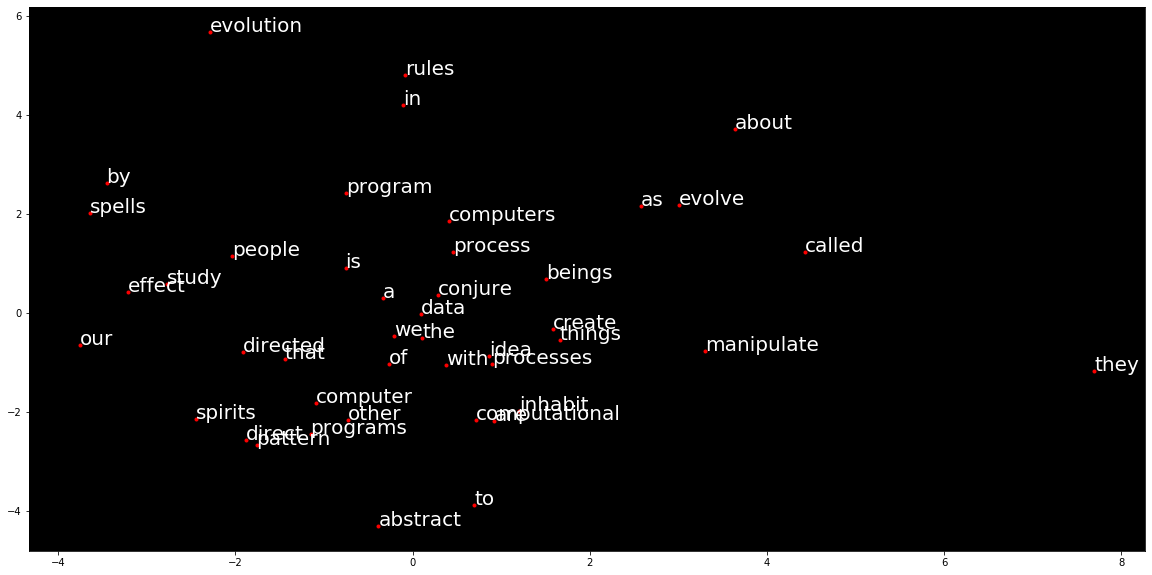

In [27]:
# 利用PCA算法进行降维
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(sg_vec)

# 绘制所有单词向量的二维空间投影
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.4, color = 'white')
# 绘制几个特殊单词的向量
words = list(w2i.keys())
# 设置中文字体，否则无法在图形上显示中文
for w in words:
    if w in w2i:
        ind = w2i[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w, alpha = 1, color = 'white', fontsize = 20)

# NGram词向量模型

本文件是集智AI学园http://campus.swarma.org 出品的“火炬上的深度学习”第VI课的配套源代码

原理：利用一个人工神经网络来根据前N个单词来预测下一个单词，从而得到每个单词的词向量

以刘慈欣著名的科幻小说《三体》为例，来展示利用NGram模型训练词向量的方法
- 预处理分为两个步骤：1、读取文件、2、分词、3、将语料划分为N＋1元组，准备好训练用数据
- 在这里，我们并没有去除标点符号，一是为了编程简洁，而是考虑到分词会自动将标点符号当作一个单词处理，因此不需要额外考虑。

In [99]:
with open("../data/3body.txt", 'r') as f:
    text = str(f.read())

In [100]:
import jieba, re
temp = jieba.lcut(text)
words = []
for i in temp:
    #过滤掉所有的标点符号
    i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：]+", "", i)
    if len(i) > 0:
        words.append(i)
print(len(words))

7754


In [101]:
text[:100]

'八万五千三体时（约8.6个地球年）后。\n\n元首下令召开三体世界全体执政官紧急会议，这很不寻常，一定有什么重大的事件发生。\n\n两万三体时前，三体舰队启航了，它们只知道目标的大致方向，却不知道它的距离。也'

In [44]:
print(*words[:50])

八万五千 三体 时 约 86 个 地球 年 后 元首 下令 召开 三体 世界 全体 执政官 紧急会议 这 很 不 寻常 一定 有 什么 重大 的 事件 发生 两万 三体 时前 三体 舰队 启航 了 它们 只 知道 目标 的 大致 方向 却 不 知道 它 的 距离 也许 目标


In [102]:
trigrams = [([words[i], words[i + 1]], words[i + 2]) for i in range(len(words) - 2)]
# 打印出前三个元素看看
print(trigrams[:3])

[(['八万五千', '三体'], '时'), (['三体', '时'], '约'), (['时', '约'], '86')]


In [103]:
# 得到词汇表
vocab = set(words)
print(len(vocab))
word_to_idx = {i:[k, 0] for k, i in enumerate(vocab)} 
idx_to_word = {k:i for k, i in enumerate(vocab)}
for w in words:
     word_to_idx[w][1] +=1

2000


构造NGram神经网络模型 (三层的网络)

1. 输入层：embedding层，这一层的作用是：先将输入单词的编号映射为一个one hot编码的向量，形如：001000，维度为单词表大小。
然后，embedding会通过一个线性的神经网络层映射到这个词的向量表示，输出为embedding_dim
2. 线性层，从embedding_dim维度到128维度，然后经过非线性ReLU函数
3. 线性层：从128维度到单词表大小维度，然后log softmax函数，给出预测每个单词的概率

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import torch

class NGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)  #嵌入层
        self.linear1 = nn.Linear(context_size * embedding_dim, 128) #线性层
        self.linear2 = nn.Linear(128, vocab_size) #线性层

    def forward(self, inputs):
        #嵌入运算，嵌入运算在内部分为两步：将输入的单词编码映射为one hot向量表示，然后经过一个线性层得到单词的词向量
        embeds = self.embeddings(inputs).view(1, -1)
        # 线性层加ReLU
        out = F.relu(self.linear1(embeds))
        
        # 线性层加Softmax
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim = 1)
        return log_probs
    def extract(self, inputs):
        embeds = self.embeddings(inputs)
        return embeds

In [89]:
losses = [] #纪录每一步的损失函数
criterion = nn.NLLLoss() #运用负对数似然函数作为目标函数（常用于多分类问题的目标函数）
model = NGram(len(vocab), 10, 2) #定义NGram模型，向量嵌入维数为10维，N（窗口大小）为2
optimizer = optim.SGD(model.parameters(), lr=0.001) #使用随机梯度下降算法作为优化器 
#循环100个周期
for epoch in range(100):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:
        # 准备好输入模型的数据，将词汇映射为编码
        context_idxs = [word_to_idx[w][0] for w in context]
        # 包装成PyTorch的Variable
        context_var = Variable(torch.LongTensor(context_idxs))
        # 清空梯度：注意PyTorch会在调用backward的时候自动积累梯度信息，故而每隔周期要清空梯度信息一次。
        optimizer.zero_grad()
        # 用神经网络做计算，计算得到输出的每个单词的可能概率对数值
        log_probs = model(context_var)
        # 计算损失函数，同样需要把目标数据转化为编码，并包装为Variable
        loss = criterion(log_probs, Variable(torch.LongTensor([word_to_idx[target][0]])))
        # 梯度反传
        loss.backward()
        # 对网络进行优化
        optimizer.step()
        # 累加损失函数值
        total_loss += loss.data
    losses.append(total_loss)
    print('第{}轮，损失函数为：{:.2f}'.format(epoch, total_loss.numpy()[0]))

第0轮，损失函数为：56704.61
第1轮，损失函数为：53935.28
第2轮，损失函数为：52241.16
第3轮，损失函数为：51008.51
第4轮，损失函数为：50113.76
第5轮，损失函数为：49434.07
第6轮，损失函数为：48879.33
第7轮，损失函数为：48404.71
第8轮，损失函数为：47983.95
第9轮，损失函数为：47600.01
第10轮，损失函数为：47240.32
第11轮，损失函数为：46897.53
第12轮，损失函数为：46566.24
第13轮，损失函数为：46241.59
第14轮，损失函数为：45920.18
第15轮，损失函数为：45599.50
第16轮，损失函数为：45277.74
第17轮，损失函数为：44953.10
第18轮，损失函数为：44624.41
第19轮，损失函数为：44290.34
第20轮，损失函数为：43950.63
第21轮，损失函数为：43604.48
第22轮，损失函数为：43251.90
第23轮，损失函数为：42891.99
第24轮，损失函数为：42524.64
第25轮，损失函数为：42149.46
第26轮，损失函数为：41766.14
第27轮，损失函数为：41374.89
第28轮，损失函数为：40975.62
第29轮，损失函数为：40568.36
第30轮，损失函数为：40153.31
第31轮，损失函数为：39730.61
第32轮，损失函数为：39300.70
第33轮，损失函数为：38863.39
第34轮，损失函数为：38419.11
第35轮，损失函数为：37968.16
第36轮，损失函数为：37510.99
第37轮，损失函数为：37048.06
第38轮，损失函数为：36579.82
第39轮，损失函数为：36106.78
第40轮，损失函数为：35629.46
第41轮，损失函数为：35148.57
第42轮，损失函数为：34665.39
第43轮，损失函数为：34180.25
第44轮，损失函数为：33693.93
第45轮，损失函数为：33207.48
第46轮，损失函数为：32721.72
第47轮，损失函数为：32237.36
第48轮，损失函数为：31755.00
第49轮，损失函数为：31275.05
第50轮，损失函数为

 12m 24s!!!

In [91]:
# 从训练好的模型中提取每个单词的向量
vec = model.extract(Variable(torch.LongTensor([v[0] for v in word_to_idx.values()])))
vec = vec.data.numpy()

# 利用PCA算法进行降维
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(vec)

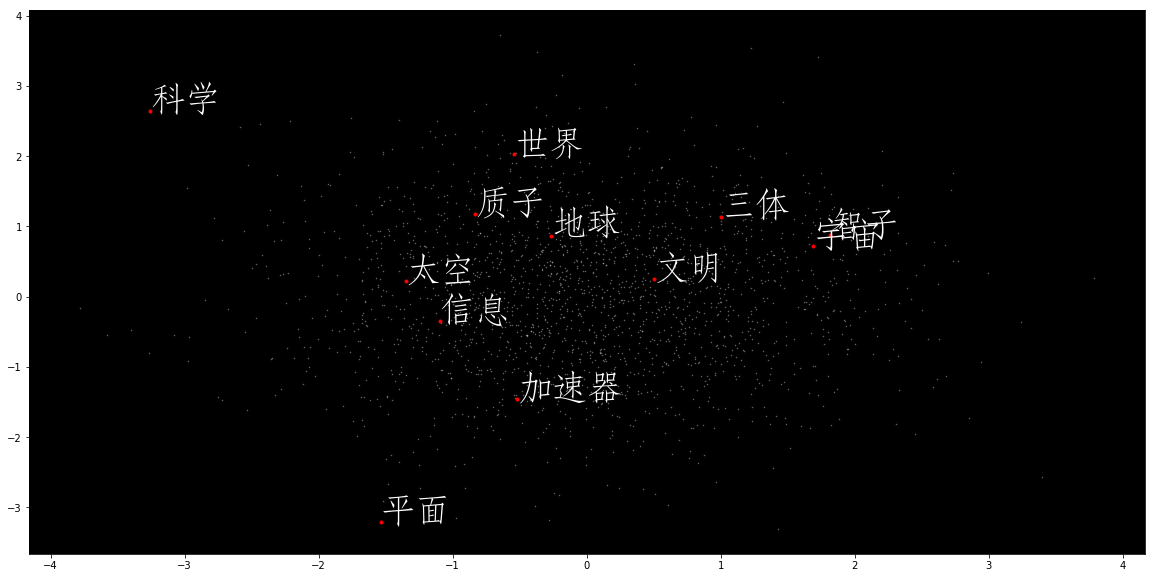

In [107]:
# 绘制所有单词向量的二维空间投影
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.4, color = 'white')
# 绘制几个特殊单词的向量
words = ['智子', '地球', '三体', '质子', '科学', '世界', '文明', '太空', '加速器', '平面', '宇宙', '信息']
# 设置中文字体，否则无法在图形上显示中文
zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size = 35)
for w in words:
    if w in word_to_idx:
        ind = word_to_idx[w][0]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'white')

In [109]:
# 定义计算cosine相似度的函数
import numpy as np
def cos_similarity(vec1, vec2):
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    norm = norm1 * norm2
    dot = np.dot(vec1, vec2)
    result = dot / norm if norm > 0 else 0
    return result
    
# 在所有的词向量中寻找到与目标词（word）相近的向量，并按相似度进行排列
def find_most_similar(word, vectors, word_idx):
    vector = vectors[word_to_idx[word][0]]
    simi = [[cos_similarity(vector, vectors[num]), key] for num, key in enumerate(word_idx.keys())]
    sort = sorted(simi)[::-1]
    words = [i[1] for i in sort]
    return words

# 与智子靠近的词汇
find_most_similar('智子', vec, word_to_idx)[:10]

['局部', '一场', '来', '错误', '一生', '正中', '航行', '地面', '只是', '政府']

# Gensim Word2vec 

In [105]:
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence
import jieba, re
import numpy as np

In [106]:
f = open("../data/三体.txt", 'r')
lines = []
for line in f:
    temp = jieba.lcut(line)
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0:
            words.append(i)
    if len(words) > 0:
        lines.append(words)

In [107]:
# 调用gensim Word2Vec的算法进行训练。
# 参数分别为：size: 嵌入后的词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines, size = 20, window = 2 , min_count = 0)

In [108]:
model.wv.most_similar('三体', topn = 10)

[('地球', 0.9993689060211182),
 ('监听', 0.999006986618042),
 ('这个', 0.998995304107666),
 ('中', 0.9989717602729797),
 ('人类', 0.9989665746688843),
 ('那些', 0.9988716840744019),
 ('设备', 0.9988386034965515),
 ('其中', 0.9988256692886353),
 ('时间', 0.9988114833831787),
 ('而', 0.9987934827804565)]

In [109]:
from sklearn.decomposition import PCA

# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.vocab):
    rawWordVec.append(model[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


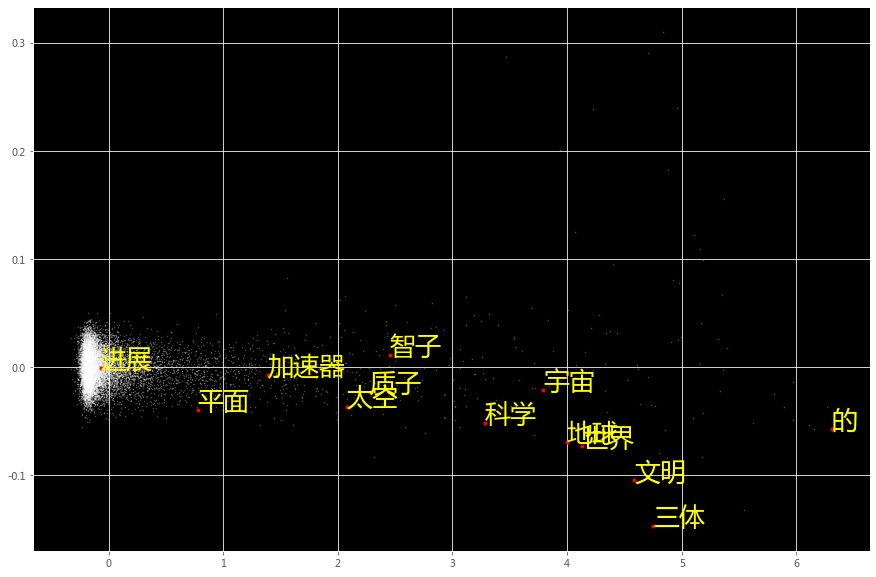

In [112]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'white')
# 绘制几个特殊单词的向量
words = ['智子', '地球', '三体', '质子', '科学', '世界', '文明', '太空', '加速器', '平面', '宇宙', '进展','的']
# 设置中文字体，否则无法在图形上显示中文
#zhfont1 = matplotlib.font_manager.FontProperties(fname='/Library/Fonts/华文仿宋.ttf', size=26)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w,  alpha = 1, color = 'yellow', fontsize = 26) # fontproperties = zhfont1,

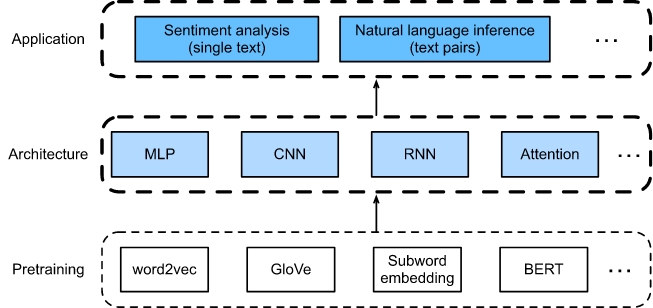

# END